In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



In [2]:
# Load data
data = pd.read_excel('Google_stock.xlsx')

# Sort data by date
data = data.sort_values('Date')

# Drop date column
data = data.drop('Date', axis=1)

# Scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split data into features (X) and target (Y)
X = data[:, :-1]
Y = data[:, -1]








data1 = pd.read_excel('Google_stock.xlsx')

#Sort the data by date
data1 = data1.sort_values('Date')




In [3]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=32)


X_train1, X_test1, Y_train1, Y_test1 = train_test_split(data1[['Open', 'High', 'Low', 'Close', 'Adj Close']], data1['Volume'], test_size=0.1, random_state=32)

In [4]:
Y_test1=np.array(Y_test1)

In [5]:
# Create ANN model
model = keras.models.Sequential([
    keras.layers.Dense(units=32, activation='relu', input_dim=X.shape[1]),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=1)
])


In [6]:

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
39/39 [==============================] - 2s 3ms/step - loss: 0.0064
Epoch 2/100
39/39 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 3/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 7/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 8/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 9/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 10/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 11/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 12/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 13/100
39/39 [=================

In [7]:
# Make predictions on test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate((X_test, predictions), axis=1))[:, -1]


5/5 [==============================] - 0s 3ms/step


In [8]:
r2 = r2_score(Y_test1, predictions)
print("R2 score: {:.2f}%".format(r2*100))

R2 score: 50.77%


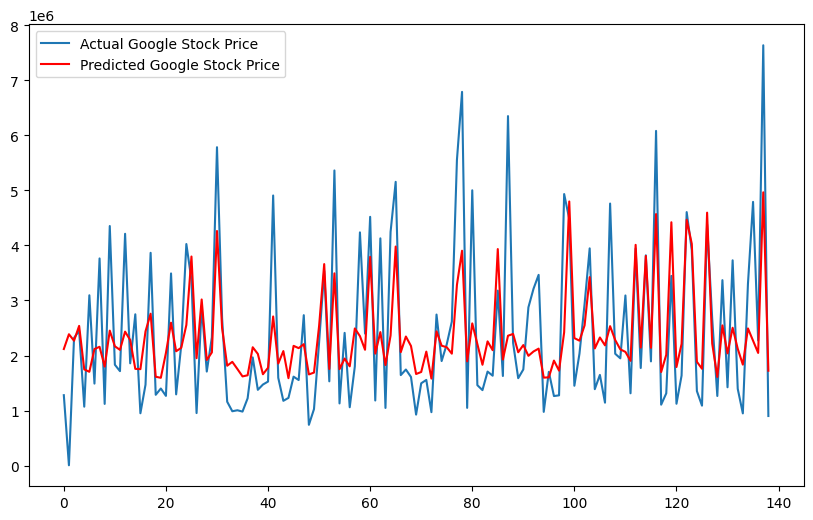

In [9]:
# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(Y_test1, label='Actual Google Stock Price')
plt.plot(predictions, color='red', label='Predicted Google Stock Price')
plt.legend()
plt.show()